In [4]:
import cv2
import matplotlib.pyplot as plt
import zipfile
import numpy as np
import seaborn as sns
%matplotlib inline

from google.colab.patches import cv2_imshow
from google.colab import drive

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading The Images

In [5]:
path = "/content/drive/MyDrive/OpenCV/Datasets/homer_bart_2.zip"
zip_object =zipfile.ZipFile(file = path,mode = "r")
zip_object.extractall("./")
zip_object.close()

# Train And Test Set

In [7]:
training_generator = ImageDataGenerator(rescale = 1./255, 
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range = 0.2)

In [9]:
train_dataset = training_generator.flow_from_directory("/content/homer_bart_2/training_set",
                                                       target_size = (64,64),
                                                       batch_size = 8,
                                                       class_mode = "categorical",
                                                       shuffle = True)

Found 215 images belonging to 2 classes.


In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [14]:
# Batch_size Önemli bak burda 1 seçtik çünkü sonuç istiyoruz !!!!
# Shuffle = False

test_generator = ImageDataGenerator(rescale = 1./255)
test_dataset = test_generator.flow_from_directory("/content/homer_bart_2/test_set",
                                                   target_size = (64,64),
                                                   batch_size = 1,
                                                   class_mode = "categorical",
                                                   shuffle = False)

Found 54 images belonging to 2 classes.


# Building And Training The Neural Network

In [16]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu" , input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 577, activation = "relu"))
model.add(Dense(units = 577, activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

In [17]:
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history = model.fit_generator(train_dataset,epochs = 50, validation_data=test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
27/27 [==============================] - 13s 68ms/step - loss: 0.7099 - accuracy: 0.6047 - val_loss: 0.6902 - val_accuracy: 0.5185
Epoch 2/50
27/27 [==============================] - 1s 49ms/step - loss: 0.6238 - accuracy: 0.6279 - val_loss: 0.5786 - val_accuracy: 0.6667
Epoch 3/50
27/27 [==============================] - 1s 50ms/step - loss: 0.5574 - accuracy: 0.7070 - val_loss: 0.5586 - val_accuracy: 0.6852
Epoch 4/50
27/27 [==============================] - 1s 50ms/step - loss: 0.4890 - accuracy: 0.7581 - val_loss: 0.3640 - val_accuracy: 0.8704
Epoch 5/50
27/27 [==============================] - 1s 50ms/step - loss: 0.5076 - accuracy: 0.7581 - val_loss: 0.4384 - val_accuracy: 0.7778
Epoch 6/50
27/27 [==============================] - 2s 61ms/step - loss: 0.4525 - accuracy: 0.7814 - val_loss: 0.3844 - val_accuracy: 0.8704
Epoch 7/50
27/27 [==============================] - 1s 49ms/step - loss: 0.4190 - accuracy: 0.8047 - val_loss: 0.3856 - val_accuracy: 0.8148
Epoch 8/50
2

In [49]:
def history_graph(history, epochs):

    plt.figure(figsize = (10,6))

    plt.subplot(121)
    plt.plot(history.history["accuracy"],label = "Train")
    plt.plot(history.history["val_accuracy"],label = "Validation")
    plt.legend(loc = "best")
    plt.title("Accuracy Score")
    plt.xticks(range(1,epochs+1,3), rotation = 90)

    plt.subplot(122)
    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"],label = "Validation")
    plt.legend(loc = "best")
    plt.title("Loss Score")
    plt.xticks(range(1,epochs+1,3), rotation = 90)

    plt.tight_layout()
    plt.show()

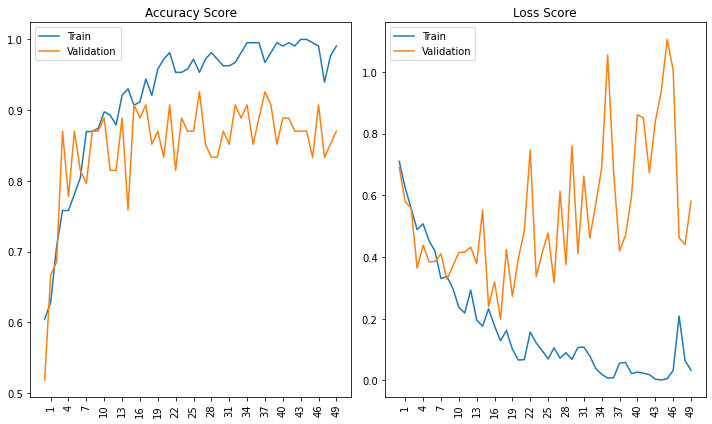

In [50]:
history_graph(history,50)

# Evaluating The Neural Network

In [26]:
model.evaluate(test_dataset)

54/54 [==============================] - 0s 7ms/step - loss: 0.5803 - accuracy: 0.8704


[0.5802645683288574, 0.8703703880310059]

In [32]:
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis = 1)
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [34]:
test_dataset.classes,test_dataset.class_indices

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32), {'bart': 0, 'homer': 1})

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
def confusion_graph(y_test,y_pred):

    cm = confusion_matrix(y_test,y_pred)

    plt.figure(figsize = (10,5))
    sns.heatmap(cm, annot = True, fmt = "d", cbar = False, linewidth = 0.4, linecolor="white", annot_kws = {"size" : 20})
    plt.ylabel("Actual",fontsize = 15)
    plt.xlabel("Predicted",fontsize = 15)
    plt.title("Confusion Matrix Graph", fontsize = 15)
    plt.show()

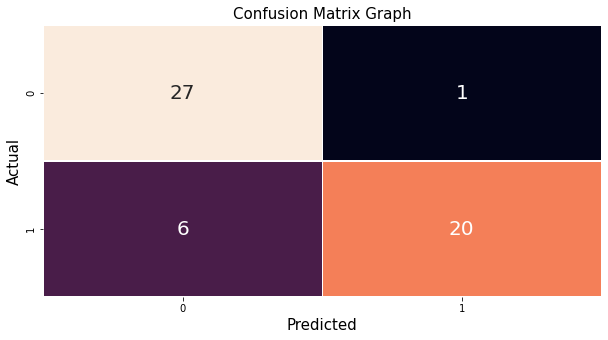

In [44]:
confusion_graph(test_dataset.classes,y_pred)

In [45]:
print(classification_report(test_dataset.classes,y_pred))
print()
print("Accuracy Score : {}".format(accuracy_score(test_dataset.classes,y_pred)))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89        28
           1       0.95      0.77      0.85        26

    accuracy                           0.87        54
   macro avg       0.89      0.87      0.87        54
weighted avg       0.88      0.87      0.87        54


Accuracy Score : 0.8703703703703703


# Saving And Loading The Model

In [46]:
model_json = model.to_json()

with open("model.json","w") as json_file:
    json_file.write(model_json)

In [48]:
save_model(model ,"model.h5")

In [52]:
with open("model.json","r") as json_file:
    model_json = json_file.read()

model_json

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_3_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_3", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2

In [53]:
from tensorflow.keras.models import model_from_json

In [84]:
# Şu kısım Çok önemli sadece 
# load_model = model_from_json(model_json) yapmak yeterli değil unutma !!!!

load_model = model_from_json(model_json)
load_model.load_weights("model.h5")
load_model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 32)        

# Classifying One Single Image

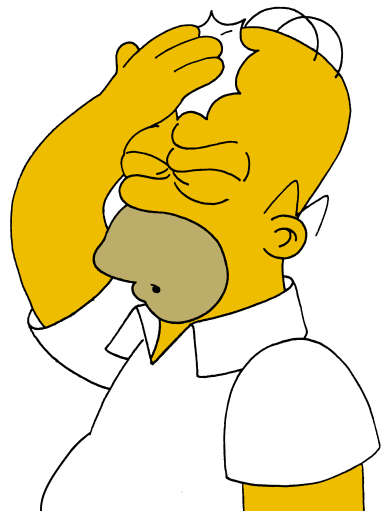

In [85]:
test_path = "/content/homer_bart_2/test_set/homer/homer2.bmp" 
test_image = cv2.imread(test_path)
cv2_imshow(test_image)

In [86]:
test_image = cv2.resize(test_image,(64,64))
test_image = test_image / 255
test_image.shape
#load_model.predict(test_image)

(64, 64, 3)

In [87]:
test_image = test_image.reshape(1,64,64,3)
test_image.shape

(1, 64, 64, 3)

In [88]:
results = (load_model.predict(test_image))
np.argmax(results)

1

In [94]:
test_path = "/content/homer_bart_2/test_set/homer/homer15.bmp" 
test_image = cv2.imread(test_path)
test_image = cv2.resize(test_image,(64,64))
test_image = test_image / 255
test_image = test_image.reshape(1,64,64,3)
results = load_model.predict(test_image)
results = np.argmax(results)
if results == 0:
    print("Bart")
else:
    print("Homer")

Homer


----

# HomeWork

In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
print(tf.__version__)

from google.colab import drive
drive.mount('/content/drive')

2.7.0
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
path = "/content/drive/MyDrive/OpenCV/Datasets/cat_dog_2.zip"
zip_object = zipfile.ZipFile(file = path,mode = "r")
zip_object.extractall("./")
zip_object.close()

In [99]:
training_generator = ImageDataGenerator(rescale = 1./255,
                                        rotation_range = 7,
                                        horizontal_flip = True,
                                        zoom_range = 0.2)

train_dataset = training_generator.flow_from_directory("/content/cat_dog_2/training_set",
                                                        target_size = (64,64),
                                                        batch_size=32,
                                                        class_mode = "categorical",
                                                        shuffle = True)

Found 4000 images belonging to 2 classes.


In [100]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_dataset = test_generator.flow_from_directory("/content/cat_dog_2/test_set",
                                                  target_size = (64,64),
                                                   batch_size = 1,
                                                   shuffle = False,
                                                   class_mode = "categorical")

Found 1000 images belonging to 2 classes.


In [101]:
train_dataset.classes,train_dataset.class_indices

(array([0, 0, 0, ..., 1, 1, 1], dtype=int32), {'cat': 0, 'dog': 1})

In [102]:
test_dataset.classes,test_dataset.class_indices

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [103]:
hom_model = Sequential()

hom_model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu" , input_shape = (64,64,3)))
hom_model.add(MaxPool2D(pool_size = (2,2)))

hom_model.add(Conv2D(filters = 32 , kernel_size = (3,3), activation = "relu"))
hom_model.add(MaxPool2D(pool_size = (2,2)))

hom_model.add(Flatten())
hom_model.add(Dense(units = 3137, activation = "relu"))
hom_model.add(Dense(units = 3137, activation = "relu"))
hom_model.add(Dense(units = 2, activation = "softmax"))

hom_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 3137)             

In [104]:
hom_model.compile(optimizer = "adam",loss = "categorical_crossentropy", metrics = ["accuracy"])
hom_history = hom_model.fit_generator(train_dataset, epochs = 10, validation_data = test_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
125/125 [==============================] - 41s 315ms/step - loss: 0.7604 - accuracy: 0.5110 - val_loss: 0.6773 - val_accuracy: 0.5720
Epoch 2/10
125/125 [==============================] - 38s 301ms/step - loss: 0.6858 - accuracy: 0.5455 - val_loss: 0.6908 - val_accuracy: 0.5280
Epoch 3/10
125/125 [==============================] - 37s 300ms/step - loss: 0.6800 - accuracy: 0.5555 - val_loss: 0.6713 - val_accuracy: 0.5960
Epoch 4/10
125/125 [==============================] - 38s 301ms/step - loss: 0.6568 - accuracy: 0.6068 - val_loss: 0.6772 - val_accuracy: 0.6200
Epoch 5/10
125/125 [==============================] - 38s 305ms/step - loss: 0.6459 - accuracy: 0.6250 - val_loss: 0.6678 - val_accuracy: 0.5830
Epoch 6/10
125/125 [==============================] - 40s 321ms/step - loss: 0.6363 - accuracy: 0.6367 - val_loss: 0.6534 - val_accuracy: 0.6340
Epoch 7/10
125/125 [==============================] - 38s 302ms/step - loss: 0.6136 - accuracy: 0.6685 - val_loss: 0.6612 - val_ac

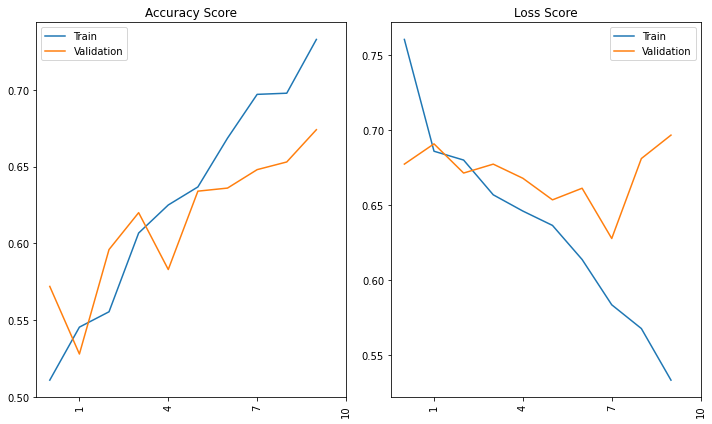

In [107]:
history_graph(hom_history,10)

In [108]:
hom_model.evaluate(test_dataset)

1000/1000 [==============================] - 9s 9ms/step - loss: 0.6966 - accuracy: 0.6740


[0.6966025233268738, 0.6740000247955322]

In [109]:
hom_y_pred = hom_model.predict(test_dataset)
hom_y_pred = np.argmax(hom_y_pred,axis = 1)
hom_y_pred[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

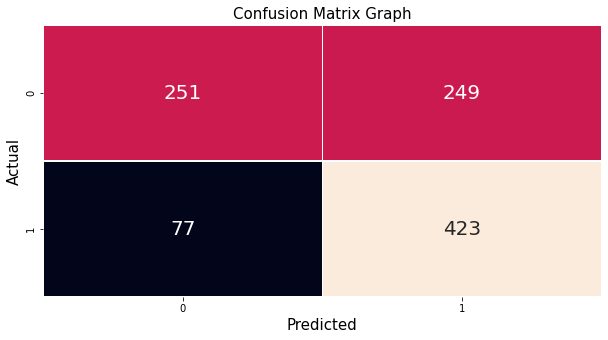

In [110]:
confusion_graph(test_dataset.classes, hom_y_pred)

In [111]:
print(classification_report(test_dataset.classes, hom_y_pred))
print()
print(accuracy_score(test_dataset.classes, hom_y_pred))

              precision    recall  f1-score   support

           0       0.77      0.50      0.61       500
           1       0.63      0.85      0.72       500

    accuracy                           0.67      1000
   macro avg       0.70      0.67      0.66      1000
weighted avg       0.70      0.67      0.66      1000


0.674


In [112]:
hom_model_json = hom_model.to_json()
with open("hom_model.json","w") as json_file:
    json_file.write(hom_model_json)

In [121]:
save_model(hom_model,"/content/hom_model.h5")

In [124]:
with open("hom_model.json","r") as json_file:
    load_hom_model_json = json_file.read()
load_hom_model_json

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_6_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_6", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_6", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2

In [125]:
load_hom_model = model_from_json(load_hom_model_json)

load_hom_model.load_weights("hom_model.h5")

load_hom_model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accurcay"])

load_hom_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 3137)             

In [128]:
test_path = "/content/cat_dog_2/test_set/cat/cat.3500.jpg"
test_image = cv2.imread(test_path)
test_image = cv2.resize(test_image,(64,64))
test_image = test_image / 255
test_image = test_image.reshape(-1,64,64,3)
results = load_hom_model.predict(test_image)
results = np.argmax(results)

if results == 0:
    print("Cat")
else:
    print("Dog")

Cat
